In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
train=pd.read_csv("C:/Users/Sarah/OneDrive/Desktop/Mentroness_Internship/Train_data.csv")
test=pd.read_csv("C:/Users/Sarah/OneDrive/Desktop/Mentroness_Internship/test_data.csv")


In [7]:
def prepreocess(data):
    x=data.drop(columns=["Disease"])
    y=data["Disease"]
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    labels=y.unique()

    label_mapping = {label: 0 if label == 'Healthy' else 1 for label in labels}

    y= y.map(label_mapping)

    return x,y


In [11]:
x,y=prepreocess(train)
x_test,y_test=prepreocess(test)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='rbf', random_state=42)  
svm.fit(x, y)

y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8683127572016461


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(x, y)
y_pred = logistic_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7119341563786008


In [17]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x, y)

y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8683127572016461


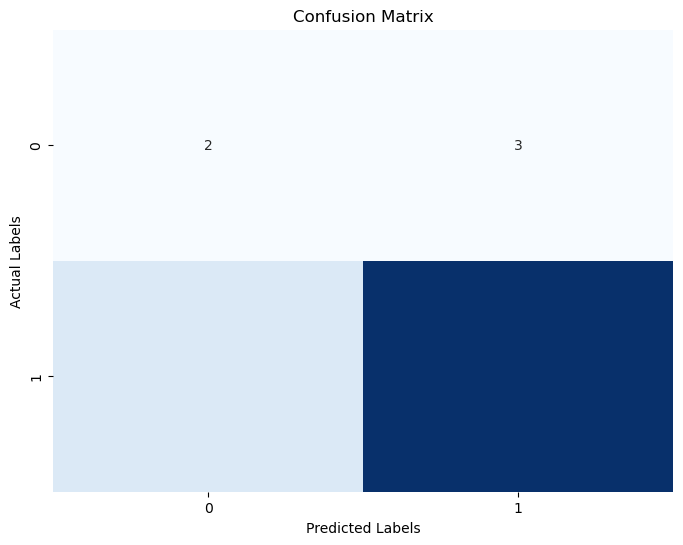

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Create labels for classes
classes = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()